In [1]:
%pip install tensorflow
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 30.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 38.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_iris
data = load_iris()

In [5]:
iris_x = data.data.T[[0,2]].T[:100]
iris_x = np.array(iris_x)
iris_y = data.target[:100]
iris_y = np.array(iris_y)

In [6]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2023-04-02 17:53:55.356755: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-02 17:53:55.414558: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-02 17:53:56.262838: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [7]:
model1 = Sequential()
model1.add(Dense(1, input_dim=2, kernel_initializer='zeros', bias_initializer='zeros', activation='linear'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [8]:
sgd1 = SGD(learning_rate=0.1)
model1.compile(optimizer=sgd1, loss='mean_squared_error', metrics=['acc'])

In [9]:
history1 = model1.fit(iris_x, iris_y, epochs=20)

Epoch 1/20
4/4 [==============================] - 0s 3ms/step - loss: 983.9155 - acc: 0.5800
Epoch 2/20
4/4 [==============================] - 0s 1ms/step - loss: 5698776064.0000 - acc: 0.5400
Epoch 3/20
4/4 [==============================] - 0s 1ms/step - loss: 24127496328839168.0000 - acc: 0.5000
Epoch 4/20
4/4 [==============================] - 0s 1ms/step - loss: 145024996265378004860928.0000 - acc: 0.4600
Epoch 5/20
4/4 [==============================] - 0s 2ms/step - loss: 760965912942800925451144396800.0000 - acc: 0.6000
Epoch 6/20
4/4 [==============================] - 0s 1ms/step - loss: 3287090262476011847156836723622674432.0000 - acc: 0.5600
Epoch 7/20
4/4 [==============================] - 0s 1ms/step - loss: inf - acc: 0.5200
Epoch 8/20
4/4 [==============================] - 0s 1ms/step - loss: inf - acc: 0.4800
Epoch 9/20
4/4 [==============================] - 0s 1ms/step - loss: inf - acc: 0.3400
Epoch 10/20
4/4 [==============================] - 0s 1ms/step - loss: inf 

Text(0, 0.5, 'Accuracy')

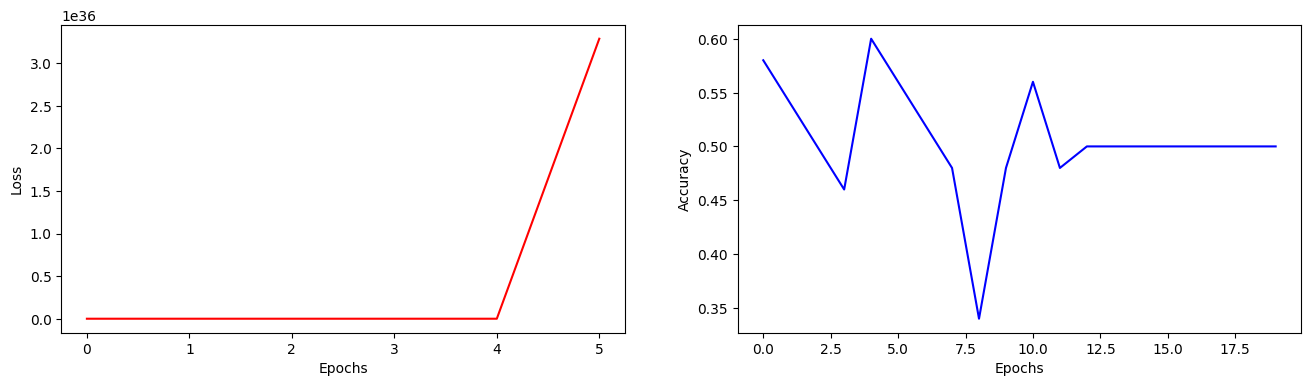

In [16]:
epochs = range(0, 20)
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
axes[0].plot(epochs, history1.history['loss'], 'r', label='Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[1].plot(epochs, history1.history['acc'], 'b', label='Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')

In [17]:
model2 = Sequential()
model2.add(Dense(1, input_dim=2, kernel_initializer='zeros', bias_initializer='zeros', activation='linear'))
sgd2 = SGD(learning_rate=0.01)
model2.compile(optimizer=sgd2, loss='mean_squared_error', metrics=['acc'])

In [18]:
history2 = model2.fit(iris_x, iris_y, epochs=20)

Epoch 1/20
4/4 [==============================] - 0s 2ms/step - loss: 0.2802 - acc: 0.8100
Epoch 2/20
4/4 [==============================] - 0s 2ms/step - loss: 0.1377 - acc: 0.9800
Epoch 3/20
4/4 [==============================] - 0s 2ms/step - loss: 0.1185 - acc: 1.0000
Epoch 4/20
4/4 [==============================] - 0s 2ms/step - loss: 0.1027 - acc: 1.0000
Epoch 5/20
4/4 [==============================] - 0s 1ms/step - loss: 0.0848 - acc: 1.0000
Epoch 6/20
4/4 [==============================] - 0s 1ms/step - loss: 0.0742 - acc: 1.0000
Epoch 7/20
4/4 [==============================] - 0s 1ms/step - loss: 0.0650 - acc: 1.0000
Epoch 8/20
4/4 [==============================] - 0s 1ms/step - loss: 0.0552 - acc: 1.0000
Epoch 9/20
4/4 [==============================] - 0s 2ms/step - loss: 0.0488 - acc: 1.0000
Epoch 10/20
4/4 [==============================] - 0s 2ms/step - loss: 0.0420 - acc: 1.0000
Epoch 11/20
4/4 [==============================] - 0s 2ms/step - loss: 0.0424 - acc: 1.00

Text(0, 0.5, 'Accuracy')

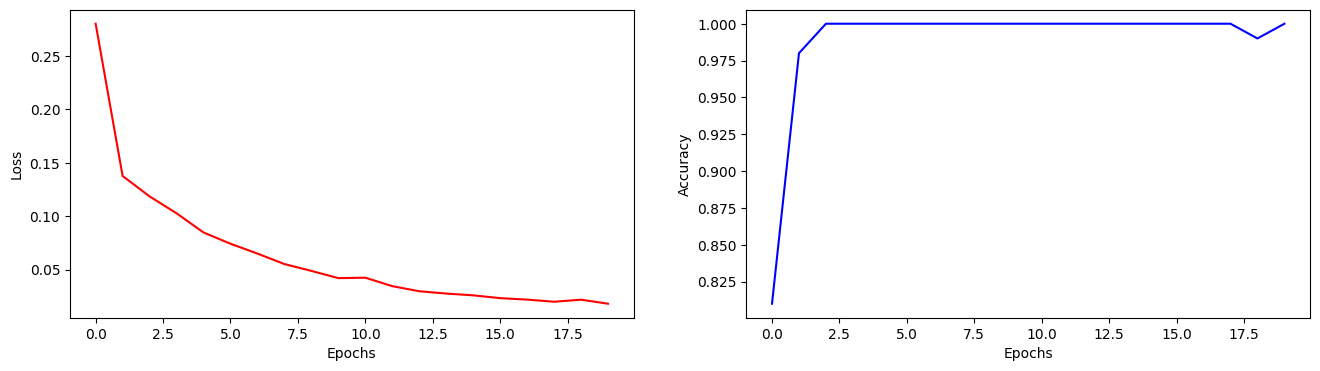

In [21]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
axes[0].plot(epochs, history2.history['loss'], 'r', label='Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[1].plot(epochs, history2.history['acc'], 'b', label='Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')

In [24]:
w, b = model2.get_weights()
f'Weights: {w[0]} {w[1]} Bias: {b}'

'Weights: [-0.06335719] [0.32112816] Bias: [-0.03287359]'

In [27]:
predicted = model2.predict(iris_x)
predicted = [(1 if x>=0.5 else 0) for x in predicted]
from sklearn import metrics
metrics.confusion_matrix(iris_y, predicted)

4/4 [==============================] - 0s 1ms/step


array([[50,  0],
       [ 0, 50]])